          hotel  is_canceled  lead_time  arrival_date_year arrival_date_month  \
0  Resort Hotel            0        342               2015               July   
1  Resort Hotel            0        737               2015               July   
2  Resort Hotel            0          7               2015               July   
3  Resort Hotel            0         13               2015               July   
4  Resort Hotel            0         14               2015               July   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
1                        27                          1   
2                        27                          1   
3                        27                          1   
4                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  ...  deposit_type  \
0                        0                     0       2  ...    No Deposit   
1     

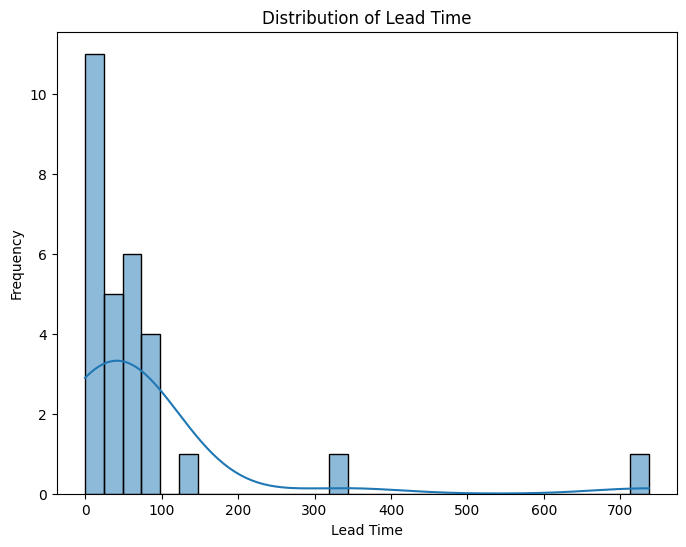

Model Accuracy: 0.5


In [ ]:
# Step 1: Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Step 2: Load the dataset into a DataFrame
data = """
hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
Resort Hotel,0,342,2015,July,27,1,0,0,2,0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NULL,NULL,0,Transient,0,0,0,Check-Out,7/1/2015
Resort Hotel,0,737,2015,July,27,1,0,0,2,0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NULL,NULL,0,Transient,0,0,0,Check-Out,7/1/2015
Resort Hotel,0,7,2015,July,27,1,0,1,1,0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NULL,NULL,0,Transient,75,0,0,Check-Out,7/2/2015
Resort Hotel,0,13,2015,July,27,1,0,1,1,0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304,NULL,0,Transient,75,0,0,Check-Out,7/2/2015
Resort Hotel,0,14,2015,July,27,1,0,2,2,0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240,NULL,0,Transient,98,0,1,Check-Out,7/3/2015
Resort Hotel,0,14,2015,July,27,1,0,2,2,0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240,NULL,0,Transient,98,0,1,Check-Out,7/3/2015
Resort Hotel,0,0,2015,July,27,1,0,2,2,0,0,BB,PRT,Direct,Direct,0,0,0,C,C,0,No Deposit,NULL,NULL,0,Transient,107,0,0,Check-Out,7/3/2015
Resort Hotel,0,9,2015,July,27,1,0,2,2,0,0,FB,PRT,Direct,Direct,0,0,0,C,C,0,No Deposit,303,NULL,0,Transient,103,0,1,Check-Out,7/3/2015
Resort Hotel,1,85,2015,July,27,1,0,3,2,0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240,NULL,0,Transient,82,0,1,Canceled,5/6/2015
Resort Hotel,1,75,2015,July,27,1,0,3,2,0,0,HB,PRT,Offline TA/TO,TA/TO,0,0,0,D,D,0,No Deposit,15,NULL,0,Transient,105.5,0,0,Canceled,4/22/2015
Resort Hotel,1,23,2015,July,27,1,0,4,2,0,0,BB,PRT,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,240,NULL,0,Transient,123,0,0,Canceled,6/23/2015
Resort Hotel,0,35,2015,July,27,1,0,4,2,0,0,HB,PRT,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,240,NULL,0,Transient,145,0,0,Check-Out,7/5/2015
Resort Hotel,0,68,2015,July,27,1,0,4,2,0,0,BB,USA,Online TA,TA/TO,0,0,0,D,E,0,No Deposit,240,NULL,0,Transient,97,0,3,Check-Out,7/5/2015
Resort Hotel,0,18,2015,July,27,1,0,4,2,1,0,HB,ESP,Online TA,TA/TO,0,0,0,G,G,1,No Deposit,241,NULL,0,Transient,154.77,0,1,Check-Out,7/5/2015
Resort Hotel,0,37,2015,July,27,1,0,4,2,0,0,BB,PRT,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,241,NULL,0,Transient,94.71,0,0,Check-Out,7/5/2015
Resort Hotel,0,68,2015,July,27,1,0,4,2,0,0,BB,IRL,Online TA,TA/TO,0,0,0,D,E,0,No Deposit,240,NULL,0,Transient,97,0,3,Check-Out,7/5/2015
Resort Hotel,0,37,2015,July,27,1,0,4,2,0,0,BB,PRT,Offline TA/TO,TA/TO,0,0,0,E,E,0,No Deposit,8,NULL,0,Contract,97.5,0,0,Check-Out,7/5/2015
Resort Hotel,0,12,2015,July,27,1,0,1,2,0,0,BB,IRL,Online TA,TA/TO,0,0,0,A,E,0,No Deposit,240,NULL,0,Transient,88.2,0,0,Check-Out,7/2/2015
Resort Hotel,0,0,2015,July,27,1,0,1,2,0,0,BB,FRA,Corporate,Corporate,0,0,0,A,G,0,No Deposit,NULL,110,0,Transient,107.42,0,0,Check-Out,7/2/2015
Resort Hotel,0,7,2015,July,27,1,0,4,2,0,0,BB,GBR,Direct,Direct,0,0,0,G,G,0,No Deposit,250,NULL,0,Transient,153,0,1,Check-Out,7/5/2015
Resort Hotel,0,37,2015,July,27,1,1,4,1,0,0,BB,GBR,Online TA,TA/TO,0,0,0,F,F,0,No Deposit,241,NULL,0,Transient,97.29,0,1,Check-Out,7/6/2015
Resort Hotel,0,72,2015,July,27,1,2,4,2,0,0,BB,PRT,Direct,Direct,0,0,0,A,A,1,No Deposit,250,NULL,0,Transient,84.67,0,1,Check-Out,7/7/2015
Resort Hotel,0,72,2015,July,27,1,2,4,2,0,0,BB,PRT,Direct,Direct,0,0,0,A,A,1,No Deposit,250,NULL,0,Transient,84.67,0,1,Check-Out,7/7/2015
Resort Hotel,0,72,2015,July,27,1,2,4,2,0,0,BB,PRT,Direct,Direct,0,0,0,D,D,1,No Deposit,250,NULL,0,Transient,99.67,0,1,Check-Out,7/7/2015
Resort Hotel,0,127,2015,July,27,1,2,5,2,0,0,HB,GBR,Offline TA/TO,TA/TO,0,0,0,D,I,0,No Deposit,115,NULL,0,Contract,94.95,0,1,Check-Out,7/1/2015
Resort Hotel,0,78,2015,July,27,1,2,5,2,0,0,BB,PRT,Offline TA/TO,TA/TO,0,0,0,D,D,0,No Deposit,5,NULL,0,Transient,63.6,1,0,Check-Out,7/8/2015
Resort Hotel,0,48,2015,July,27,1,2,5,2,0,0,BB,IRL,Offline TA/TO,TA/TO,0,0,0,D,D,0,No Deposit,8,NULL,0,Contract,79.5,0,0,Check-Out,7/8/2015
Resort Hotel,1,60,2015,July,27,1,2,5,2,0,0,BB,PRT,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,240,NULL,0,Transient,107,0,2,Canceled,5/11/2015
Resort Hotel,0,77,2015,July,27,1,2,5,2,0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240,NULL,0,Transient,94,0,0,Check-Out,7/8/2015
"""

from io import StringIO
df = pd.read_csv(StringIO(data))

# Step 3: Exploratory Data Analysis (EDA)
# Display the first few rows of the dataset
print(df.head())

# Check for missing values
print(df.isnull().sum())

# Step 4: Data Visualization
# Example: Histogram of lead time
plt.figure(figsize=(8, 6))
sns.histplot(df['lead_time'], bins=30, kde=True)
plt.title('Distribution of Lead Time')
plt.xlabel('Lead Time')
plt.ylabel('Frequency')
plt.show()

# Step 5: Feature Engineering
# Example: Total number of guests feature
df['total_guests'] = df['adults'] + df['children'] + df['babies']

# Step 6: Further Analysis and Modeling
# Example: Predicting special requests
# You can use classification models like logistic regression, decision trees, or random forests
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split

# Define features and target variable
X = df[['lead_time', 'total_guests', 'stays_in_weekend_nights', 'stays_in_week_nights']]
y = df['total_of_special_requests']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a model
from sklearn.ensemble import RandomForestClassifier

# Initialize the model
model = RandomForestClassifier()

# Fit the model
model.fit(X_train, y_train)

# Evaluate the model
accuracy = model.score(X_test, y_test)
print("Model Accuracy:", accuracy)
